##### Import the required library, modlue and load the data

In [1]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('../scripts'))

# Change the current working directory to the appropriate path
os.chdir('/home/semre/telecom_user_behaviour_analysis')
# Import the required functions and modules
from src.utils import missing_values_table, connvert_bytes_to_megabytes, fix_outlier, remove_outliers
from data_loader import load_data_from_db
# Call the function to load data
query = "SELECT * FROM public.xdr_data"
df = load_data_from_db(query)

Host: localhost, Port: 5432, DB: telecom_db, User: postgres


In [2]:
# Preview the dataset
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# Check the column names in the DataFrame
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


##### Handling Missing Values and Outliers

In [5]:
# Convert relevant columns from bytes to megabytes
df['TCP DL Retrans. Vol (Bytes)'] = connvert_bytes_to_megabytes(df, 'TCP DL Retrans. Vol (Bytes)')
df['TCP UL Retrans. Vol (Bytes)'] = connvert_bytes_to_megabytes(df, 'TCP UL Retrans. Vol (Bytes)')
df['Avg Bearer TP DL (kbps)'] = connvert_bytes_to_megabytes(df, 'Avg Bearer TP DL (kbps)')
df['Avg Bearer TP UL (kbps)'] = connvert_bytes_to_megabytes(df, 'Avg Bearer TP UL (kbps)')

In [7]:
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['Avg Bearer TP DL (kbps)'] = df['Avg Bearer TP DL (kbps)'].fillna(df['Avg Bearer TP DL (kbps)'].mean())
df['Avg Bearer TP UL (kbps)'] = df['Avg Bearer TP UL (kbps)'].fillna(df['Avg Bearer TP UL (kbps)'].mean())
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])

In [8]:
# Remove or cap outliers
fix_outlier(df, 'TCP DL Retrans. Vol (Bytes)')
fix_outlier(df, 'TCP UL Retrans. Vol (Bytes)')
fix_outlier(df, 'Avg RTT DL (ms)')
fix_outlier(df, 'Avg RTT UL (ms)')
fix_outlier(df, 'Avg Bearer TP DL (kbps)')
fix_outlier(df, 'Avg Bearer TP UL (kbps)')

#### 1. Aggregate Information per Customer

In [9]:
# Group by 'MSISDN/Number' and aggregate
agg_df = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]
}).reset_index()

##### 2. Compute Top, Bottom, and Most Frequent Values

In [10]:
# Function to compute top, bottom, and most frequent values
def compute_statistics(df, column):
    top_10 = df[column].nlargest(10)
    bottom_10 = df[column].nsmallest(10)
    most_frequent = df[column].mode().head(10)
    return top_10, bottom_10, most_frequent

# Compute statistics for relevant columns
tcp_dl_top, tcp_dl_bottom, tcp_dl_freq = compute_statistics(df, 'TCP DL Retrans. Vol (Bytes)')
tcp_ul_top, tcp_ul_bottom, tcp_ul_freq = compute_statistics(df, 'TCP UL Retrans. Vol (Bytes)')
rtt_dl_top, rtt_dl_bottom, rtt_dl_freq = compute_statistics(df, 'Avg RTT DL (ms)')
rtt_ul_top, rtt_ul_bottom, rtt_ul_freq = compute_statistics(df, 'Avg RTT UL (ms)')
throughput_dl_top, throughput_dl_bottom, throughput_dl_freq = compute_statistics(df, 'Avg Bearer TP DL (kbps)')
throughput_ul_top, throughput_ul_bottom, throughput_ul_freq = compute_statistics(df, 'Avg Bearer TP UL (kbps)')

#### 3. Distribution and Average Analysis by Handset Type

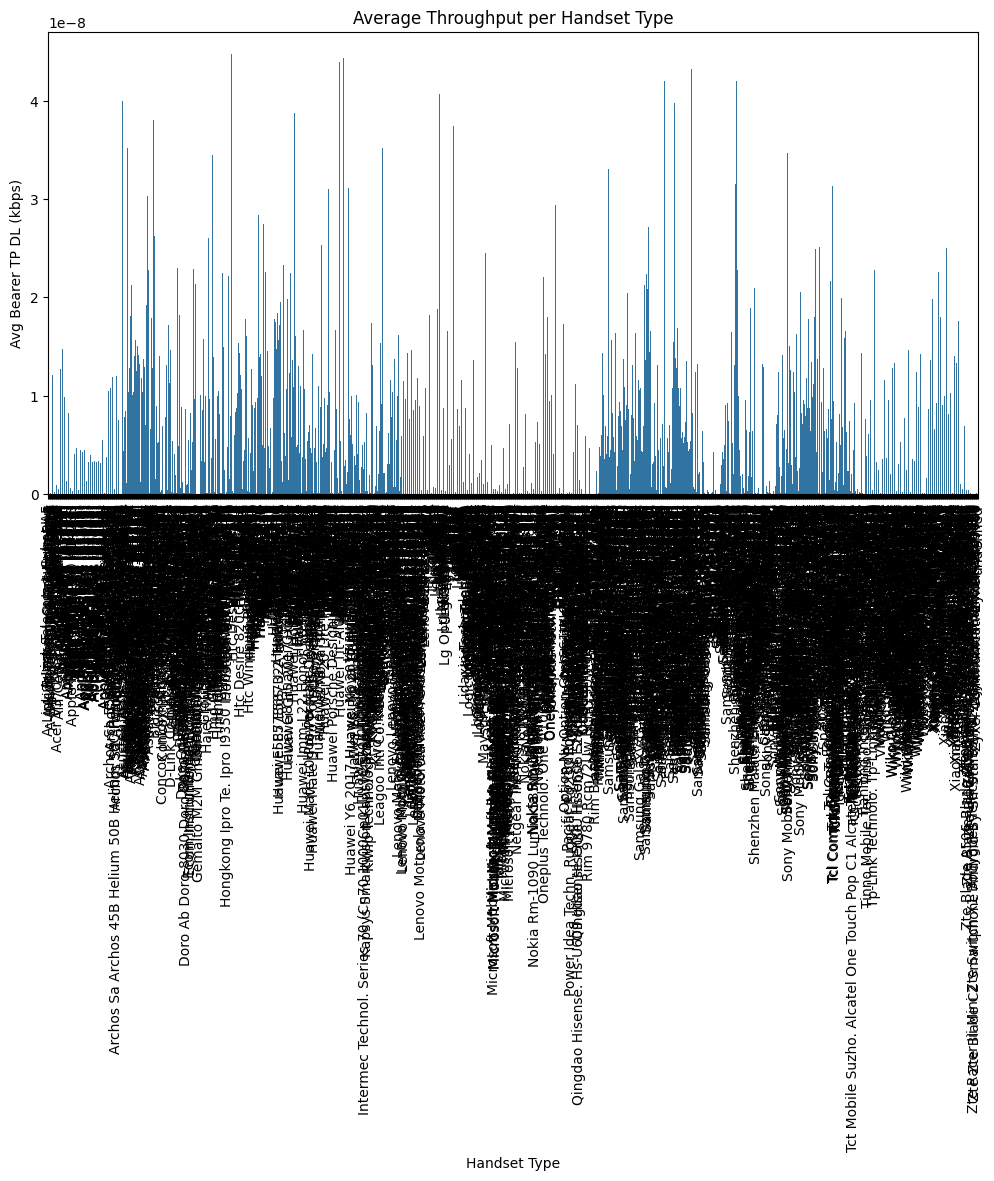

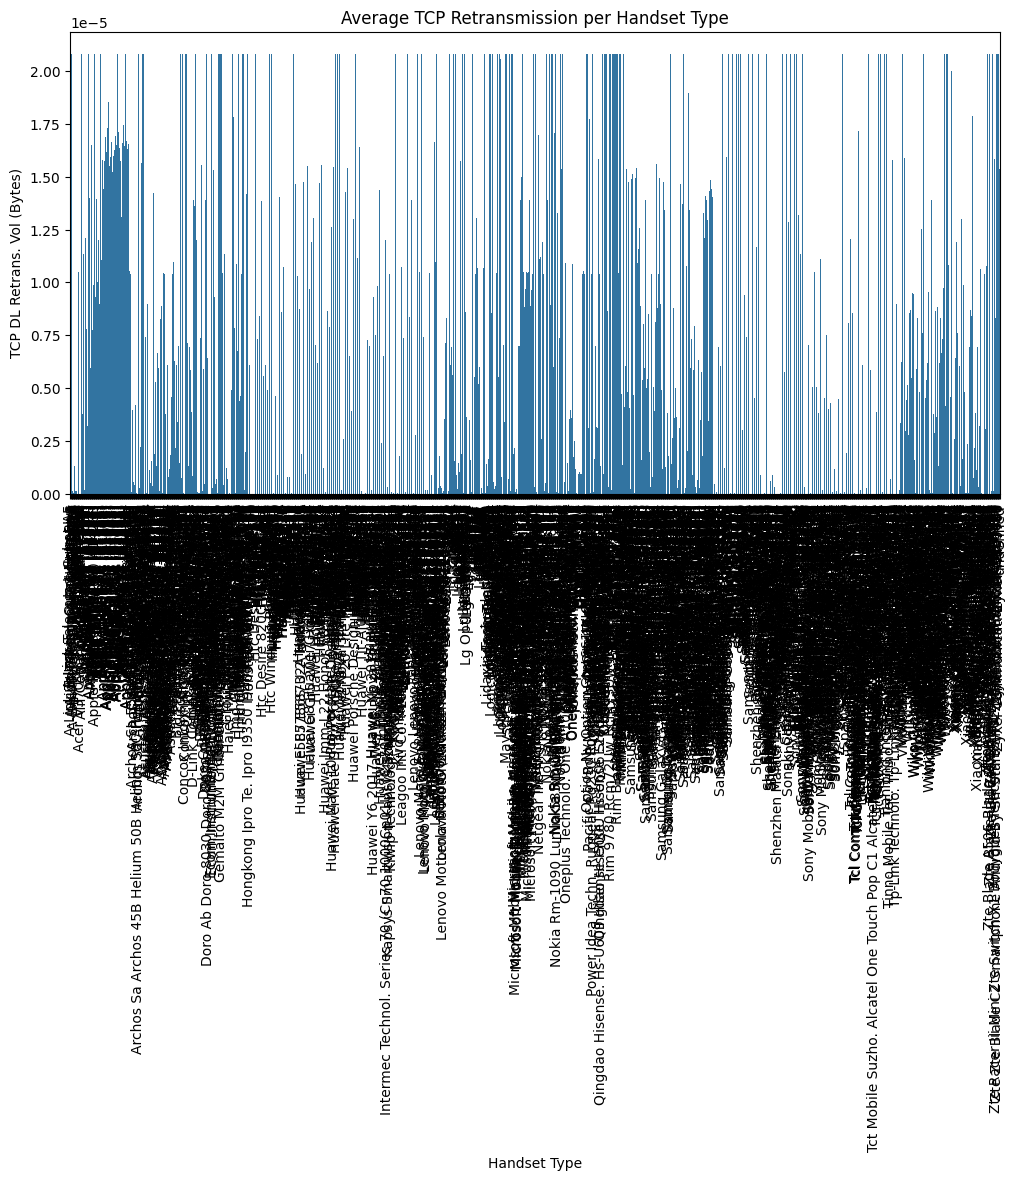

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of average throughput per handset type
throughput_by_handset = df.groupby('Handset Type')['Avg Bearer TP DL (kbps)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Handset Type', y='Avg Bearer TP DL (kbps)', data=throughput_by_handset)
plt.xticks(rotation=90)
plt.title('Average Throughput per Handset Type')
plt.show()

# Average TCP retransmission per handset type
tcp_by_handset = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Handset Type', y='TCP DL Retrans. Vol (Bytes)', data=tcp_by_handset)
plt.xticks(rotation=90)
plt.title('Average TCP Retransmission per Handset Type')
plt.show()

#### 4. K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
features = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
X = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Describe clusters
cluster_description = df.groupby('Cluster').agg({
    'TCP DL Retrans. Vol (Bytes)': ['mean', 'std'],
    'TCP UL Retrans. Vol (Bytes)': ['mean', 'std'],
    'Avg RTT DL (ms)': ['mean', 'std'],
    'Avg RTT UL (ms)': ['mean', 'std'],
    'Avg Bearer TP DL (kbps)': ['mean', 'std'],
    'Avg Bearer TP UL (kbps)': ['mean', 'std']
}).reset_index()

print(cluster_description)

  Cluster TCP DL Retrans. Vol (Bytes)           TCP UL Retrans. Vol (Bytes)  \
                                 mean       std                        mean   
0       0                    0.000019  0.000006                7.280678e-07   
1       1                    0.000003  0.000006                1.411827e-07   
2       2                    0.000020  0.000003                7.319476e-07   

                Avg RTT DL (ms)            Avg RTT UL (ms)            \
            std            mean        std            mean       std   
0  1.453454e-07       39.295096  15.918563        3.977212  3.282099   
1  2.464164e-07       55.856051  19.940734       10.148722  7.023227   
2  1.308927e-07      104.866125  15.798664       17.853925  2.924512   

  Avg Bearer TP DL (kbps)               Avg Bearer TP UL (kbps)                
                     mean           std                    mean           std  
0            6.938685e-10  3.088260e-09            1.105273e-10  2.416723e-10  
1  